# **Importing Libraries**

In [93]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgbm
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [94]:
print(f'matplotlib vesion: {matplotlib.__version__}')
print(f'pandas vesion:     {pd.__version__}')
print(f'numpy vesion:      {np.__version__}')
print(f'seaborn vesion:    {sns.__version__}')
print(f'sklearn vesion:    {skl.__version__}')
print(f'lightgbm vesion:   {lgbm.__version__}')

matplotlib vesion: 3.2.2
pandas vesion:     1.1.5
numpy vesion:      1.19.5
seaborn vesion:    0.11.1
sklearn vesion:    0.22.2.post1
lightgbm vesion:   2.2.3


# **loading Datasets**

In [95]:
train = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/Train.csv') 
test = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/Test.csv')

In [96]:
train.head(10)

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0
5,ID_002OY1ME,77,0,69.0,2,NaN,NaN,2,NaN,1.0,NaN,2,2,2,2.0,2,2,2,2,1,NaN,1,6.0,NaN,2.0,2,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0
6,ID_002SIOPQ,141,4,58.0,1,NaN,2.0,2,NaN,1.0,NaN,2,2,2,1.0,1,2,1,2,2,NaN,1,2.0,1.0,2.0,1,2,2.0,NaN,NaN,1,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,0,0
7,ID_003CXK49,97,7,32.0,1,NaN,2.0,2,NaN,2.0,NaN,2,2,2,2.0,2,1,2,2,2,NaN,1,2.0,NaN,2.0,2,2,NaN,NaN,NaN,1,2,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,0
8,ID_003OKZ71,60,2,59.0,1,1.0,2.0,2,NaN,NaN,NaN,2,2,2,2.0,2,2,2,2,1,NaN,2,NaN,2.0,2.0,2,2,NaN,2.0,NaN,2,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1,0
9,ID_004ACG4R,69,0,60.0,2,NaN,NaN,2,1.0,2.0,2.0,2,2,2,2.0,2,2,2,1,2,2.0,1,4.0,2.0,2.0,2,2,NaN,NaN,NaN,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,1,0


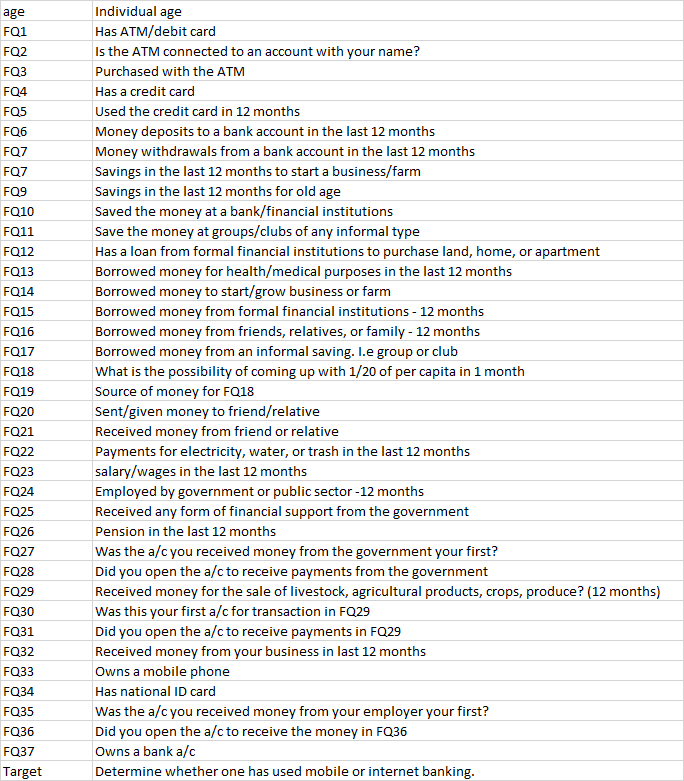

# **Exploring and Transforming The Data**

In [97]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country_code,108446.0,68.544953,41.529264,0.0,33.0,65.0,105.0,143.0
region,108446.0,2.894242,2.286505,-1.0,1.0,3.0,4.0,7.0
age,108124.0,41.857395,17.876105,15.0,27.0,39.0,55.0,99.0
FQ1,108446.0,1.563294,0.530077,1.0,1.0,2.0,2.0,4.0
FQ2,49124.0,1.063716,0.288075,1.0,1.0,1.0,1.0,4.0
FQ3,46218.0,1.299710,0.468503,1.0,1.0,1.0,2.0,4.0
FQ4,108446.0,1.824622,0.435942,1.0,2.0,2.0,2.0,4.0
FQ5,21185.0,1.160113,0.383827,1.0,1.0,1.0,1.0,4.0
FQ6,60659.0,1.223907,0.450140,1.0,1.0,1.0,1.0,4.0
FQ7,60620.0,1.206961,0.440780,1.0,1.0,1.0,1.0,4.0


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

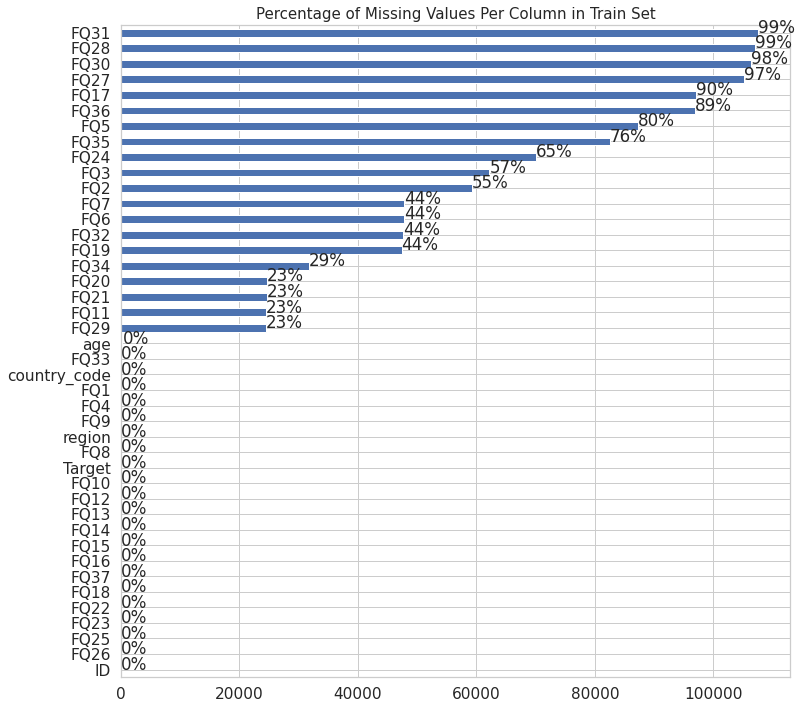

In [99]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (12, 12))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [100]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)

In [101]:
all_data.shape

(154923, 42)

In [102]:
# #droping columns with more than 80% missing values
all_data.drop(['FQ5','FQ36','FQ17','FQ27','FQ30','FQ28','FQ31'],
              axis = 1,
              inplace = True)

In [103]:
mean_age = all_data['age'].mean()

#Filling the missing values on 
all_data['age'].fillna(mean_age, inplace= True)

In [104]:
#columns that don't have missing values
not_missing_cols = all_data.loc[:,np.all(~ all_data.isnull(), axis=0)].columns.difference(["ID","Target"])

#coulmns that have missing values 
missing_cols = all_data.columns.difference(not_missing_cols).difference(["Target","ID"])

In [105]:
def KNN_impute(dataset, column, n_neighbors):
  """
  This function takes a dataset and column with missing values,
  creat KNN model that will train on rows and cols that are not missing 
  and using those rows to predcit the missing one.
  Last thing filing missing values with our prediciotns and returning the dataset. 
  """
  
  missing_rows = dataset.loc[dataset[column].isnull(),:]  #rows that are missing on the chosen column
  not_missing_rows = dataset.loc[~ dataset[column].isnull(),:] #rows that are not missing values on the chosen column

  #creating the KNN object
  knn = LGBMClassifier(n_estimators= n_neighbors)
  #training the model on the rows that are not missing 
  knn.fit(not_missing_rows[not_missing_cols],not_missing_rows[column])
  #predicting the rows that are missing
  pred_missing = knn.predict(missing_rows[not_missing_cols])

  dataset.loc[dataset[column].isnull(),column] = pred_missing
  
  return dataset

In [106]:
#Imputing missing values in all columns that have missing
for col in missing_cols:
  all_data = KNN_impute(all_data, col,4)

In [107]:
all_data

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,1.0,1.0,2,1.0,1.0,2,1,1,2.0,2,2,2,2,2,2,4.0,2.0,1.0,1,2,2.0,1.0,2,2,1.0,2.0,1.0,1.0,0,0.0
1,ID_000QLXZM,32,7,70.0,2,1.0,1.0,2,1.0,1.0,2,2,2,2.0,2,2,2,2,2,1,3.0,2.0,1.0,1,2,2.0,2.0,1,1,2.0,2.0,1.0,2.0,0,0.0
2,ID_001728I2,71,7,22.0,2,1.0,1.0,2,1.0,1.0,2,2,2,4.0,2,2,1,2,1,1,1.0,2.0,2.0,1,2,2.0,2.0,2,1,2.0,2.0,2.0,1.0,1,0.0
3,ID_001R7IDN,48,3,27.0,1,1.0,1.0,2,2.0,1.0,2,1,1,2.0,2,2,2,2,2,1,1.0,1.0,2.0,1,2,2.0,2.0,2,2,2.0,2.0,1.0,1.0,1,0.0
4,ID_0029QKF8,25,0,79.0,2,1.0,1.0,2,1.0,1.0,2,2,1,2.0,2,2,2,2,1,1,1.0,2.0,2.0,1,1,2.0,2.0,2,2,2.0,2.0,1.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154918,ID_ZZYOTVBJ,112,3,38.0,1,1.0,1.0,2,1.0,1.0,2,2,2,2.0,1,2,2,2,2,1,1.0,2.0,2.0,2,2,1.0,2.0,2,2,4.0,2.0,1.0,1.0,1,NaN
154919,ID_ZZYSX122,82,2,77.0,2,1.0,1.0,2,1.0,1.0,1,2,1,2.0,2,2,2,2,1,3,1.0,2.0,2.0,2,2,2.0,2.0,2,1,2.0,2.0,1.0,2.0,1,NaN
154920,ID_ZZYXQDSD,93,5,26.0,2,1.0,1.0,2,1.0,1.0,1,1,2,2.0,2,1,2,2,1,2,1.0,2.0,2.0,1,4,2.0,2.0,1,2,2.0,2.0,1.0,1.0,1,NaN
154921,ID_ZZZH9SS4,6,7,59.0,2,1.0,1.0,2,1.0,1.0,2,2,2,1.0,2,2,2,2,2,2,1.0,2.0,2.0,2,2,2.0,2.0,2,2,2.0,2.0,1.0,1.0,1,NaN


In [108]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154923 entries, 0 to 154922
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            154923 non-null  object 
 1   country_code  154923 non-null  int64  
 2   region        154923 non-null  int64  
 3   age           154923 non-null  float64
 4   FQ1           154923 non-null  int64  
 5   FQ2           154923 non-null  float64
 6   FQ3           154923 non-null  float64
 7   FQ4           154923 non-null  int64  
 8   FQ6           154923 non-null  float64
 9   FQ7           154923 non-null  float64
 10  FQ8           154923 non-null  int64  
 11  FQ9           154923 non-null  int64  
 12  FQ10          154923 non-null  int64  
 13  FQ11          154923 non-null  float64
 14  FQ12          154923 non-null  int64  
 15  FQ13          154923 non-null  int64  
 16  FQ14          154923 non-null  int64  
 17  FQ15          154923 non-null  int64  
 18  FQ16

In [109]:
for col in all_data.columns.difference(['Target']):
  if all_data[col].dtype == 'float64':
    all_data[col] = all_data[col].astype(int)

In [110]:
#Target Encoding
for col in all_data.columns.difference(['Target','age']):
  all_data[col] = all_data[col].map(all_data.groupby(col)['Target'].mean())

In [111]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((108446, 35), (46477, 35))

# **Building and Evaluating The Model**

In [112]:
features = train_df.columns.difference(['ID','Target'])

X = train_df[features]
y = train_df['Target']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)

In [113]:
def evaluate_model(y_test,y_pred):                                              #function return classifations matrix for every model
  acc = round(accuracy_score(y_test, y_pred),2)
  prec = round(precision_score(y_test, y_pred),2)                               # tp / (tp + fp)
  rec = round(recall_score(y_test, y_pred),2)                                   # tp / (tp + fn)
  f1 = round(f1_score(y_test, y_pred),2)
  return pd.DataFrame({'Metrics':['Accuracy','Precision','Recall','F1'],
                       'Scores':[acc,prec,rec,f1]})
  

In [114]:
# Confusion matrix
def confusion_mat(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
  plt.figure(figsize = (8,6))
  plt.title('Confusing Matrix')
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True, fmt='g')

In [115]:
w = 0.28  #class weight for the negative class

model =  LGBMClassifier(n_estimators=20,
                      reg_lambda=0.3,
                      max_depth=2,
                      subsample_for_bin=2000,  
                      class_weight={0: w, 1: 1-w})

 
# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)


fold_metrics = []

for train_index, test_index in str_kf.split(train_df.iloc[:,1:],train_df.Target):
  cv_train, cv_test = train_df.iloc[train_index], train_df.iloc[test_index]
# Train a model
  model.fit(cv_train[features],cv_train.Target)
# Make predictions
  predictions = model.predict(cv_test[features])
# Calculate the metric
  metric = roc_auc_score(cv_test.Target, predictions)
  fold_metrics.append(metric)

np.mean(fold_metrics), np.std(fold_metrics)

(0.5146942479370987, 0.0016888524178013127)

In [116]:
#saving the score to add it to submission file name to help us tracking the local validation score with the score in the leaderboard
Local_val = round(np.mean(fold_metrics),4)   

In [117]:
# #Hyperparameter Tuning 
# param_grid = {'reg_alpha': np.arange(0,5.1,0.1)}

# estimator = LGBMClassifier(n_estimators=20,
#                       reg_lambda=0.3,
#                       colsample_bytree=1,
#                       max_depth=2,
#                       subsample_for_bin=2000,  
#                       class_weight={0: w, 1: 1-w})

# gridsearch = GridSearchCV(estimator= estimator, 
#                           param_grid= param_grid,
#                           cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=123), 
#                           n_jobs=5, 
#                           scoring='roc_auc', 
#                           verbose=10).fit(X_train.values,y_train)


# gridsearch.best_params_, gridsearch.best_score_

In [118]:
y_pred = model.predict(X_test)

evaluate_model(y_test,y_pred)

,Metrics,Scores
0,Accuracy,0.58
1,Precision,0.29
2,Recall,0.38
3,F1,0.33


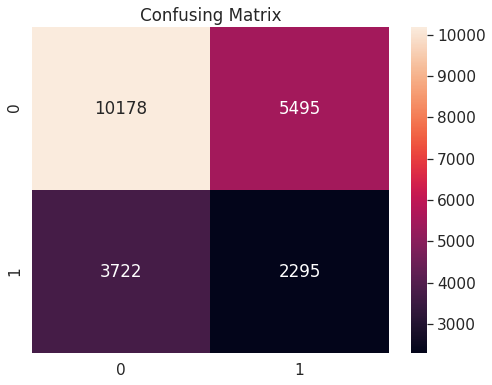

In [119]:
#Confusing Matrix
confusion_mat(y_test,y_pred)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69     15673
         1.0       0.29      0.38      0.33      6017

    accuracy                           0.58     21690
   macro avg       0.51      0.52      0.51     21690
weighted avg       0.61      0.58      0.59     21690



# **Making Submission**

In [121]:
ss = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/SampleSubmission.csv')
# Make prediction on the test set
# test_df = test_df[main_cols]

predictions = model.predict_proba(test_df[features])

# Create a submission file
sub_file = ss.copy()
sub_file.Target = predictions[:,1]

In [122]:
# Create a csv file to upload to zindi 
sub_file.to_csv(f'iX_mobile_sub({Local_val}).csv', index = False)  